(0, 1)
(0, 2)
(1, 2)


In [8]:
import os
import matplotlib.pyplot as plt
dir_ = '../../'
graph_folders = [folder for folder in os.listdir(dir_) if 'graphs' in folder]

In [9]:
def max_landscape(data):
    maximum = 0
    max_key = None
    for k, _ in data.items():
        if 'landscape' in k:
            disc = int(k.split('_')[1][1:])
            if disc > maximum:
                maximum = disc
                max_key = k
    if max_key is None:
        print("nothing here!")
    else:
        beta = float(max_key.split('_')[2][1:])
        gamma = float(max_key.split('_')[3][1:])
        return data[max_key], gamma, beta

In [10]:
from networkx.algorithms.isomorphism import is_isomorphic
def isomorphism_classes(graphs):
    classes = []
    for g in graphs:
        graph = g[0]
        appended = False
        for class_ in classes:
            if is_isomorphic(graph, class_[0][0]):
                class_.append(g)
                appended = True
                break
        if not appended:
            classes.append([g])
    return classes

def prune_graphs(classes):
    for class_ in classes:
        while len(class_) > 1:
            duplicate = class_.pop()
            os.remove(duplicate[1])

In [11]:
from classical_optimization.terra.utils import read_graph
from classical_optimization.qaoa_circuits import plot_landscape
def clean_up_graphs():
    for folder in graph_folders:
        path = os.path.join(dir_, folder)
        files = [f for f in os.listdir(path)]
        graphs = []
        for f in files:
            if 'pkl' in f:
                f = os.path.join(dir_, folder, f)
                data = read_graph(f)
                graphs.append((data['graph'], f))
                #DELETES FILES, UNCOMMENT CAREFULLY
                if len(data) == 1:
                    os.remove(f)
        prune_graphs(isomorphism_classes(graphs))

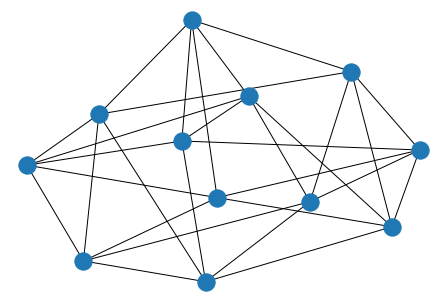

../../12_graphs


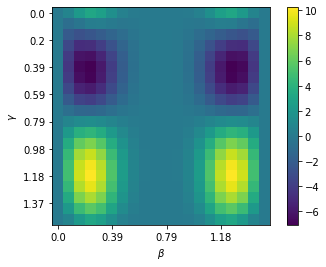

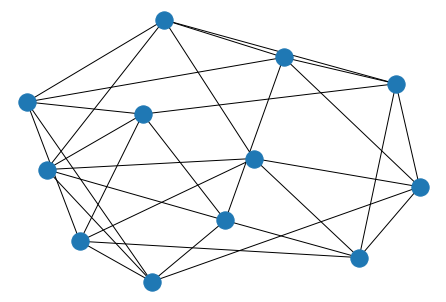

../../12_graphs


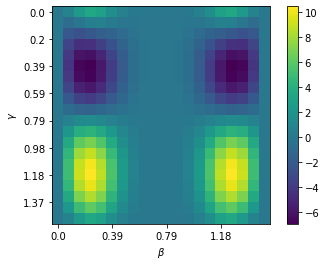

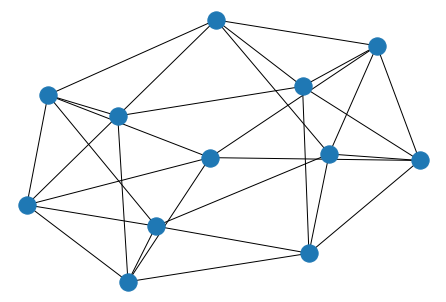

../../12_graphs


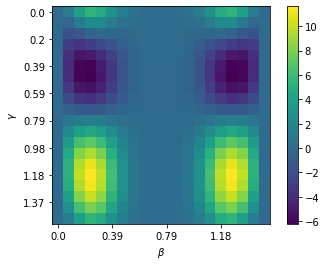

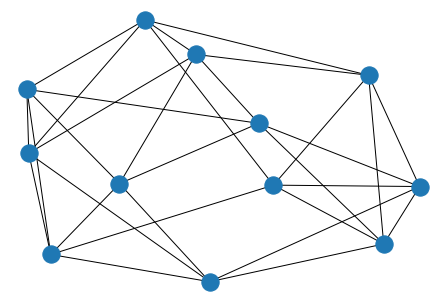

../../12_graphs


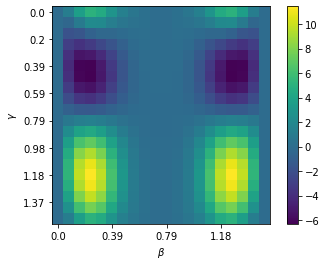

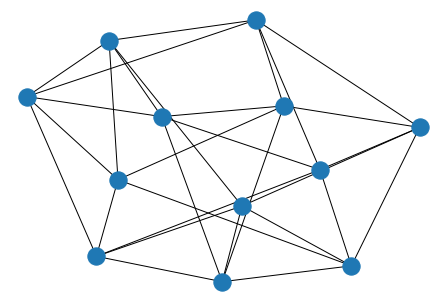

../../12_graphs


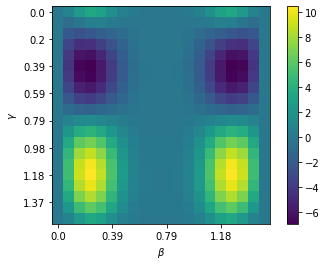

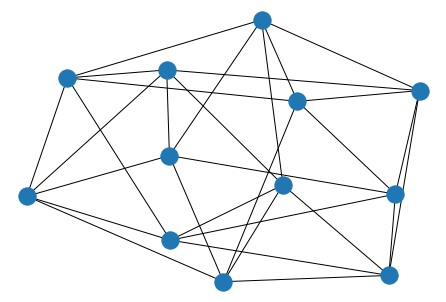

../../12_graphs


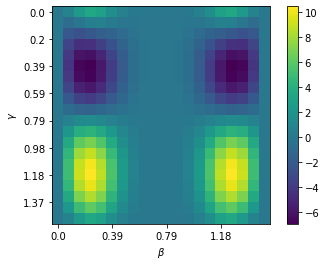

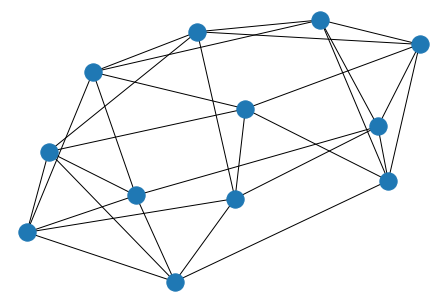

../../12_graphs


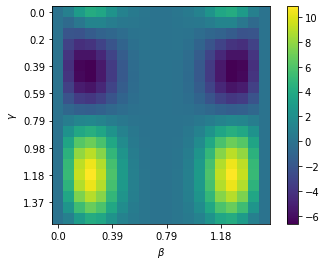

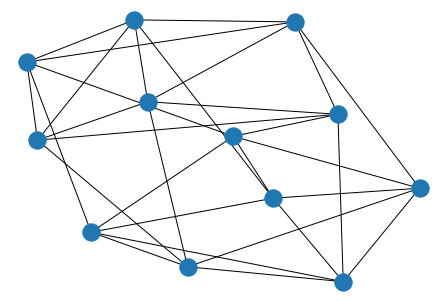

../../12_graphs


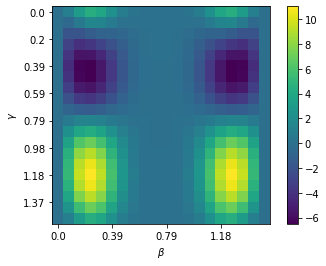

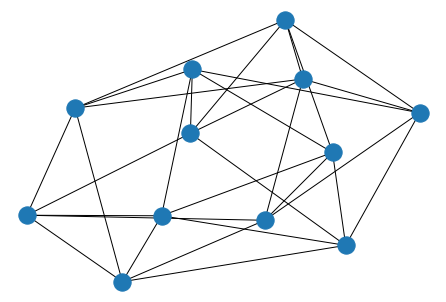

../../12_graphs


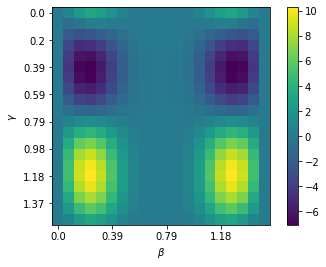

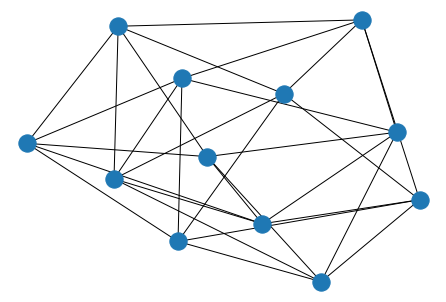

../../12_graphs


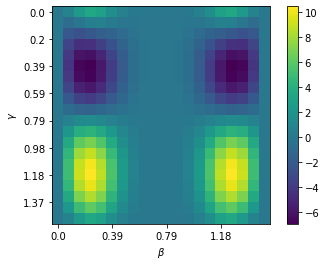

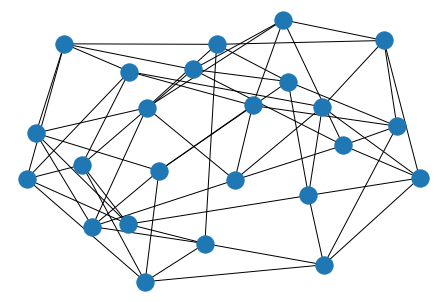

../../24_graphs


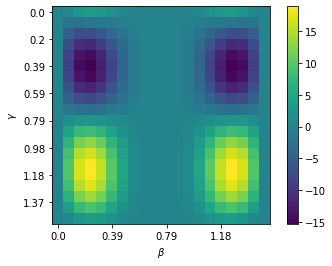

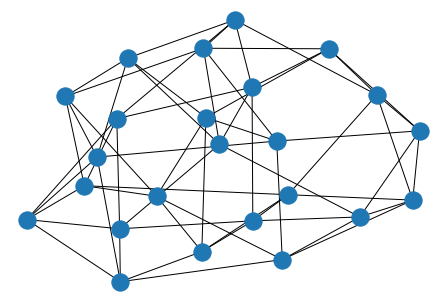

../../24_graphs


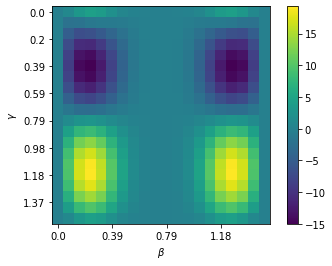

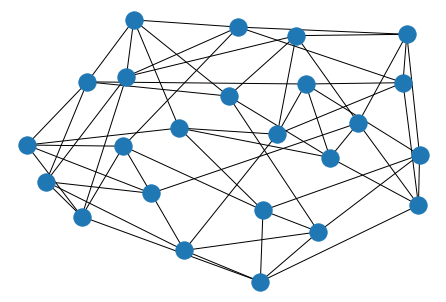

../../24_graphs


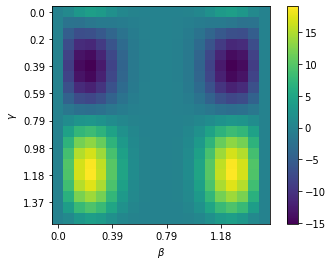

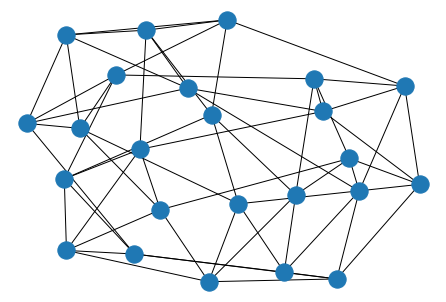

../../24_graphs


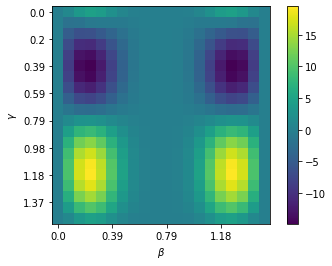

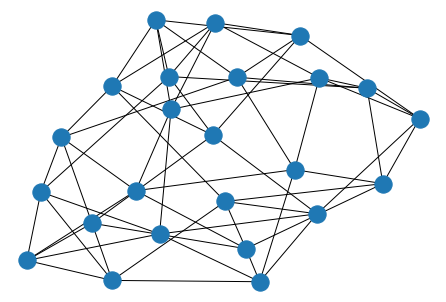

../../24_graphs


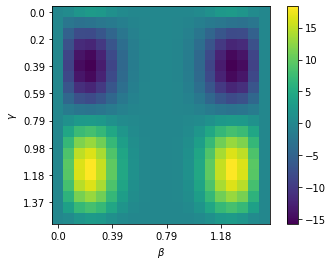

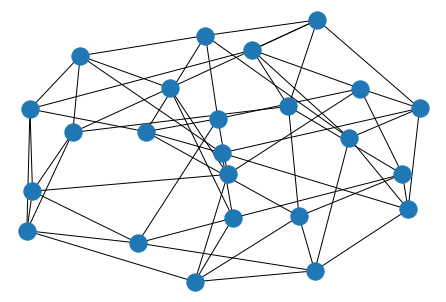

../../24_graphs


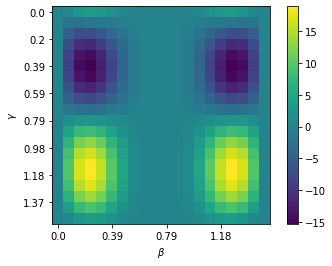

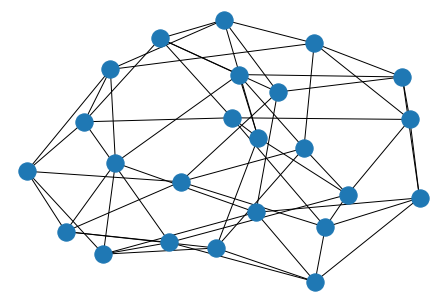

../../24_graphs


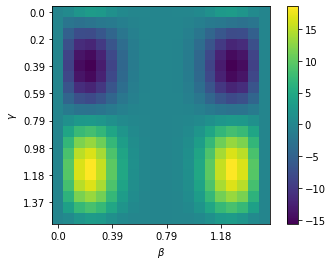

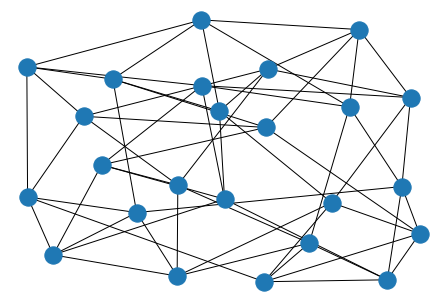

../../24_graphs


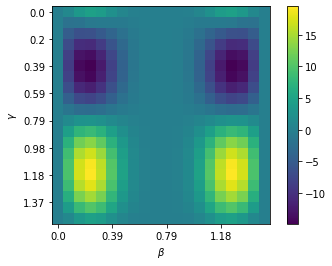

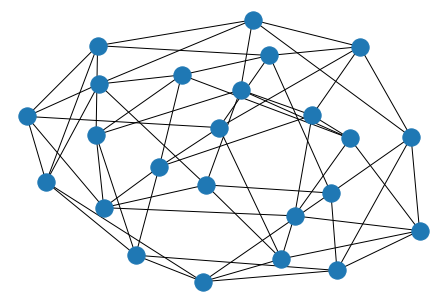

../../24_graphs


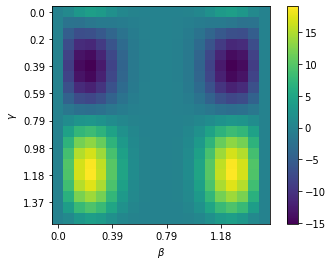

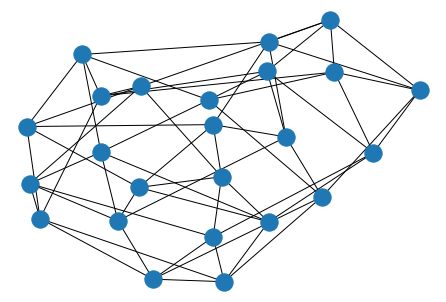

../../24_graphs


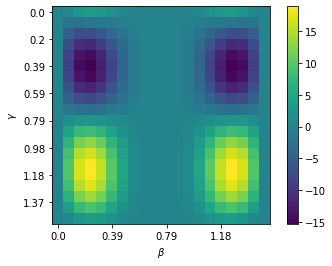

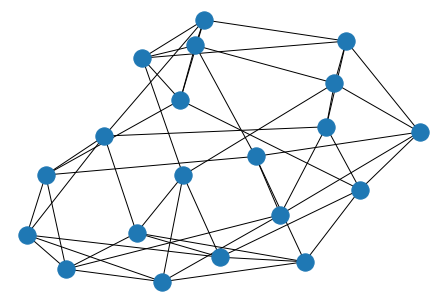

../../20_graphs


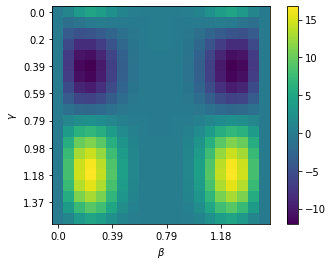

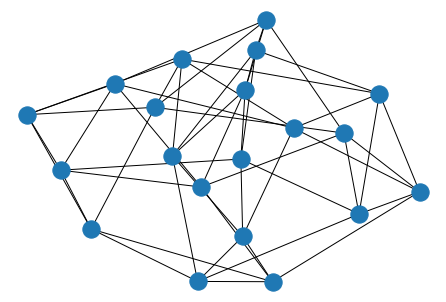

../../20_graphs


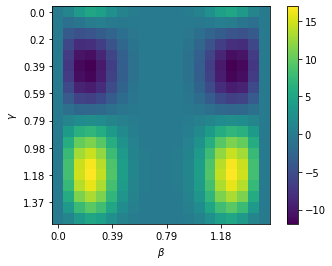

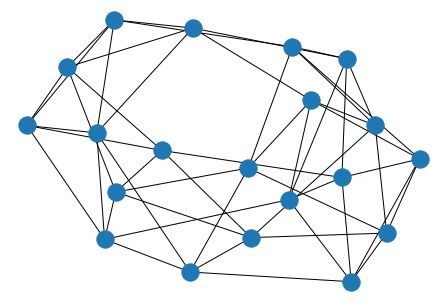

../../20_graphs


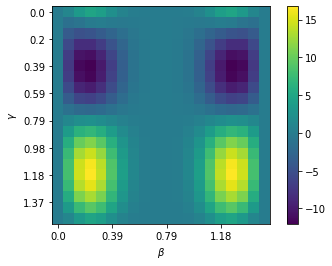

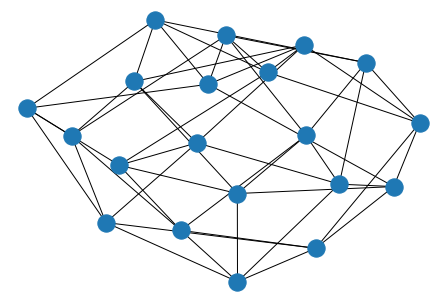

../../20_graphs


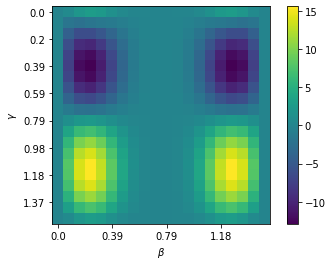

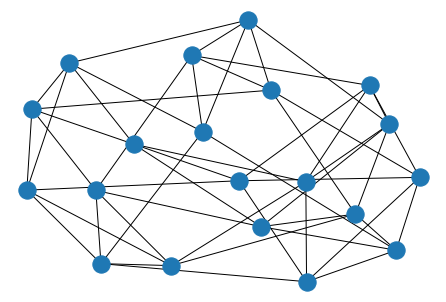

../../20_graphs


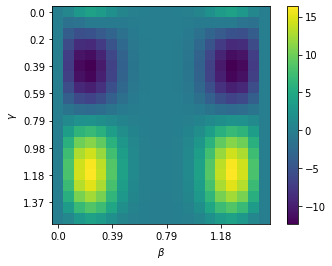

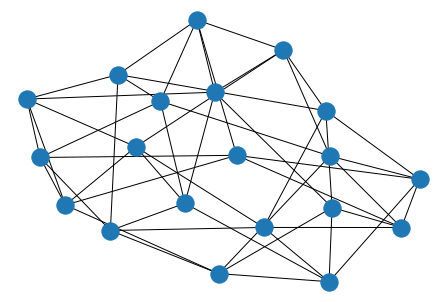

../../20_graphs


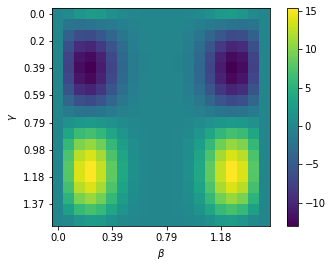

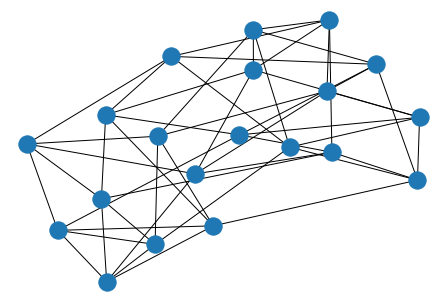

../../20_graphs


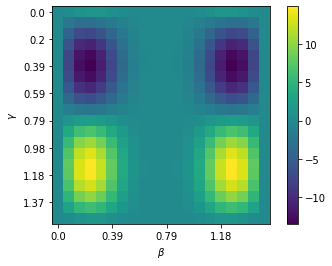

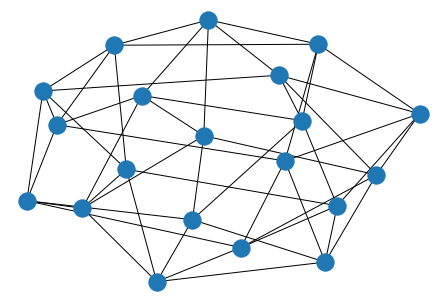

../../20_graphs


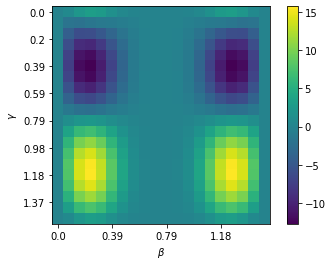

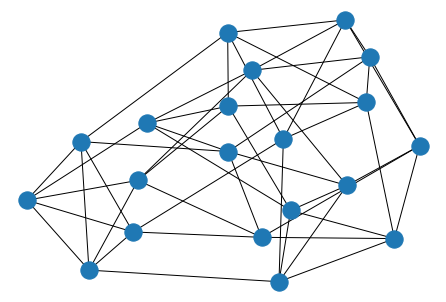

../../20_graphs


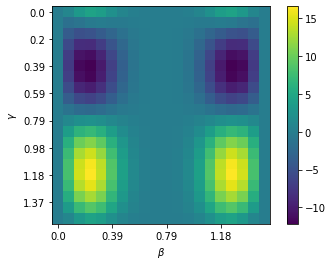

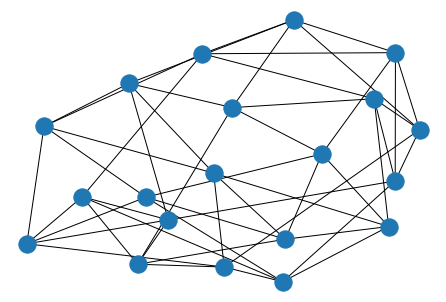

../../20_graphs


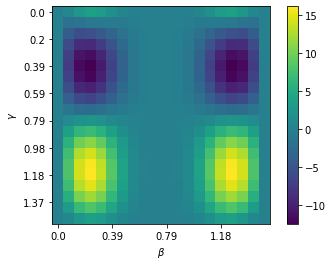

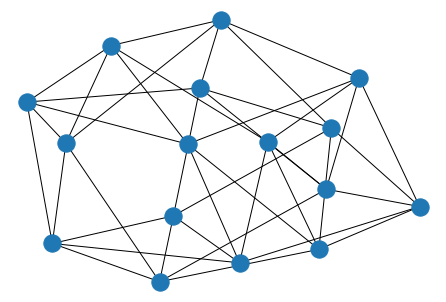

../../16_graphs


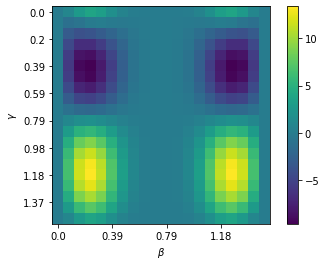

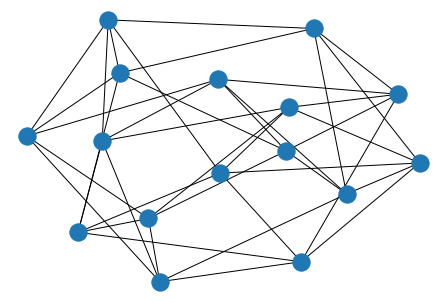

../../16_graphs


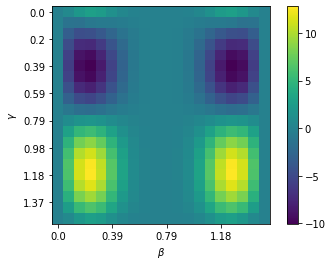

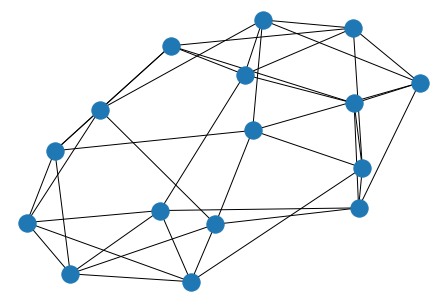

../../16_graphs


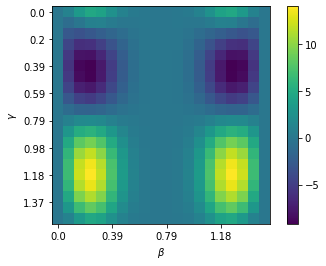

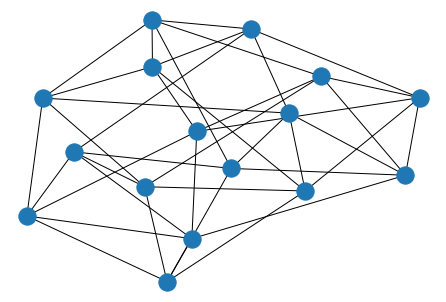

../../16_graphs


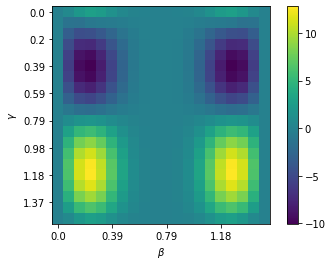

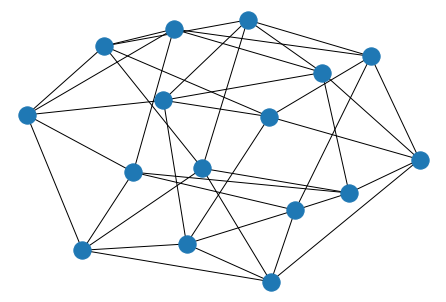

../../16_graphs


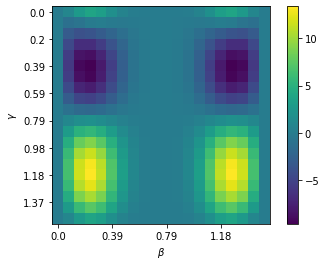

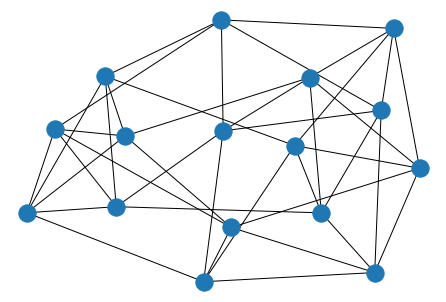

../../16_graphs


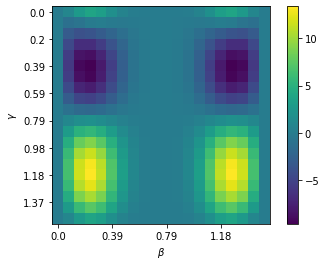

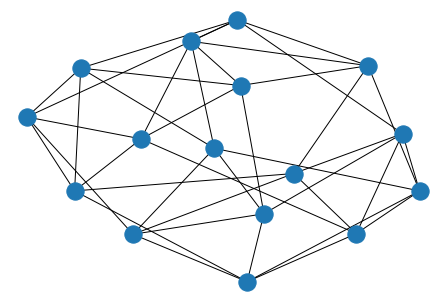

../../16_graphs


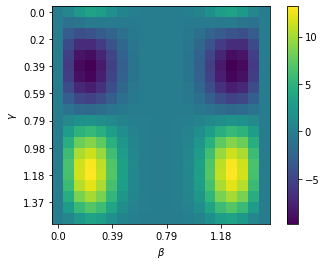

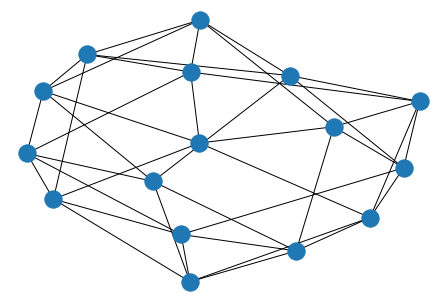

../../16_graphs


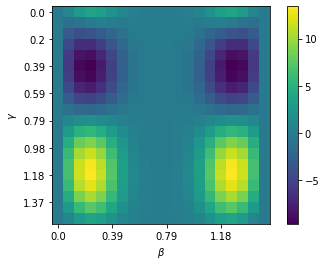

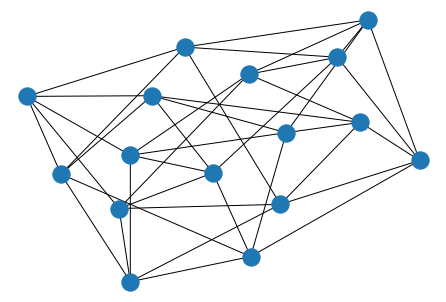

../../16_graphs


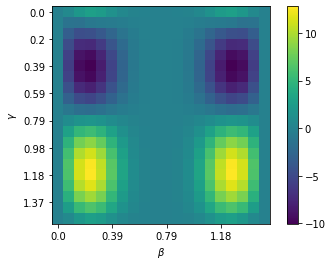

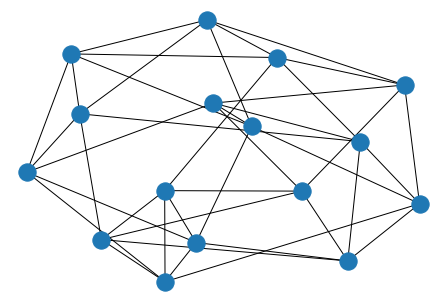

../../16_graphs


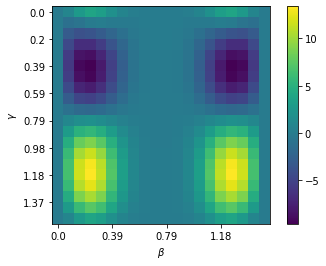

In [12]:
import networkx as nx
for folder in graph_folders:
        path = os.path.join(dir_, folder)
        files = [f for f in os.listdir(path)]
        graphs = []
        for f in files:
            f = os.path.join(dir_, folder, f)
            data = read_graph(f)
            nx.draw(data['graph'])
            plt.show()
            plot_data = max_landscape(data)
            if plot_data is not None:
                print(path)
                plot_landscape(*plot_data)
            plt.show()
